In [0]:
#imports
import math
import random
import copy
import json

In [0]:
dataset_file = open('dataset.json.txt', 'r')
data = json.loads(dataset_file.read())

In [3]:
def get_population(data):
    if 'Население' in data and data['Население'].isnumeric():
        return int(data['Население'])
    return -1

def preprocess(data):
    preprocessed_data = []
    sorted_data = sorted(data, key=get_population, reverse=True)[:30]
    for population in sorted_data:
        if len(population['Город']) == 0:
            population['Город'] = population['Регион']
        preprocessed_data.append([population['Город'], population['Широта'], population['Долгота']])
    return preprocessed_data

preprocessed_data = preprocess(data)
preprocessed_data

[['Москва', '55.7538789', '37.6203735'],
 ['Санкт-Петербург', '59.939125', '30.3158225'],
 ['Новосибирск', '55.0281016', '82.9210575'],
 ['Екатеринбург', '56.8386326', '60.6054887'],
 ['Нижний Новгород', '56.3242093', '44.0053948'],
 ['Казань', '55.7943877', '49.1115312'],
 ['Самара', '53.1951657', '50.1067691'],
 ['Омск', '54.9848136', '73.3674638'],
 ['Челябинск', '55.1603659', '61.4007858'],
 ['Ростов-на-Дону', '47.2224364', '39.7187866'],
 ['Уфа', '54.734853', '55.9578647'],
 ['Волгоград', '48.7072005', '44.5170207'],
 ['Пермь', '58.0103211', '56.2341778'],
 ['Красноярск', '56.009466', '92.8524162'],
 ['Воронеж', '51.6592378', '39.1968284'],
 ['Саратов', '51.530376', '45.9530257'],
 ['Краснодар', '45.040235', '38.9760801'],
 ['Тольятти', '53.5206438', '49.389461'],
 ['Барнаул', '53.3481145', '83.7798362'],
 ['Ижевск', '56.8527444', '53.2113961'],
 ['Ульяновск', '54.3080674', '48.3748717'],
 ['Владивосток', '43.1163807', '131.882348'],
 ['Ярославль', '57.6216145', '39.897878'],
 ['И

In [0]:
def transform_deg_to_rad(deg):
      return deg * math.pi / 180

def calc_distance(lat_1, long_1, lat_2, long_2):
      R = 6371e3
      rad_1 = transform_deg_to_rad(lat_1)
      rad_2 = transform_deg_to_rad(lat_2)
      long_1r = transform_deg_to_rad(long_1)
      long_2r = transform_deg_to_rad(long_2)
      cos_d = math.sin(rad_1) * math.sin(rad_2) + math.cos(rad_1) * math.cos(rad_2) * math.cos(long_1r - long_2r)
      distance = math.acos(cos_d)
      distance = distance * R
      return distance

def total_distance(data):
    total = 0
    for i in range(len(data)):
        city_1 = data[i]
        city_2 = data[(i+1) % len(data)]
        total += calc_distance(float(city_1[1]), float(city_1[2]), float(city_2[1]), float(city_2[2]))
    return total / 1000
      

In [0]:
class SimulatedAnnealing:
    def __init__(self, data, t0, anneal_rate, min_t=1e-5):
        self.data = copy.deepcopy(data)
        self.back_data = copy.deepcopy(data)
        self.t0 = t0
        self.min_t = min_t
        self.t = t0
        self.anneal_rate = anneal_rate
        self.saved_dist = []
        
    def change_cities(self):
        index_1 = random.randint(0, len(self.data)-1)
        index_2 = random.randint(0, len(self.data)-1)
        
        if index_1 < index_2:
            temp1 = self.data[:index_1].copy()
            temp2 = self.data[index_1:index_2].copy()
            temp3 = self.data[index_2:].copy()
            temp2.reverse()
            self.data = temp1 + temp2 + temp3

        if index_1 > index_2:
            temp1 = self.data[:index_2].copy()
            temp2 = self.data[index_2:index_1].copy()
            temp3 = self.data[index_1:].copy()
            temp1.reverse()
            temp3.reverse()
            self.data = temp3 + temp2 + temp1



        # temp = self.data[index_1]
        # self.data[index_1] = self.data[index_2]
        # self.data[index_2] = temp
        # self.data[index_1], self.data[index_2] = self.data[index_2], self.data[index_1]
        
    def start(self):
        loss = total_distance(self.data)
        i = 0
        while i <= 2000:
            self.change_cities()
            loss_ap = total_distance(self.data)
            if loss_ap <= loss:
                self.back_data = copy.deepcopy(self.data)
                loss = loss_ap
            else:
                p = math.exp((loss - loss_ap) / self.t)
                if p > random.uniform(0,1):
                    self.back_data = copy.deepcopy(self.data)
                    loss = loss_ap
                else:
                    self.data = self.back_data

            if (i % 1 == 0):
                self.saved_dist.append(loss)
                print('Iteration: ', i, ' Loss: ', loss, ' Temp: ', self.t)  
            i += 1
            self.t = max(self.t0 * self.anneal_rate / i, self.min_t)
        
        return self.back_data, self.saved_dist

In [6]:
sa = SimulatedAnnealing(preprocessed_data, 100000, 0.8)
result, saved_dist = sa.start()
print(result)
print(total_distance(result))

Iteration:  0  Loss:  65169.09675632492  Temp:  100000
Iteration:  1  Loss:  65197.455192574234  Temp:  80000.0
Iteration:  2  Loss:  62845.1487616009  Temp:  40000.0
Iteration:  3  Loss:  65405.57865176809  Temp:  26666.666666666668
Iteration:  4  Loss:  65405.57865176808  Temp:  20000.0
Iteration:  5  Loss:  65424.038144460144  Temp:  16000.0
Iteration:  6  Loss:  65399.883587153585  Temp:  13333.333333333334
Iteration:  7  Loss:  65399.883587153585  Temp:  11428.57142857143
Iteration:  8  Loss:  65399.883587153585  Temp:  10000.0
Iteration:  9  Loss:  65479.520724527436  Temp:  8888.888888888889
Iteration:  10  Loss:  66714.84832264167  Temp:  8000.0
Iteration:  11  Loss:  63194.91020586026  Temp:  7272.727272727273
Iteration:  12  Loss:  63194.91020586026  Temp:  6666.666666666667
Iteration:  13  Loss:  61339.0039654586  Temp:  6153.846153846154
Iteration:  14  Loss:  61965.72324384279  Temp:  5714.285714285715
Iteration:  15  Loss:  62535.269732684246  Temp:  5333.333333333333
Ite

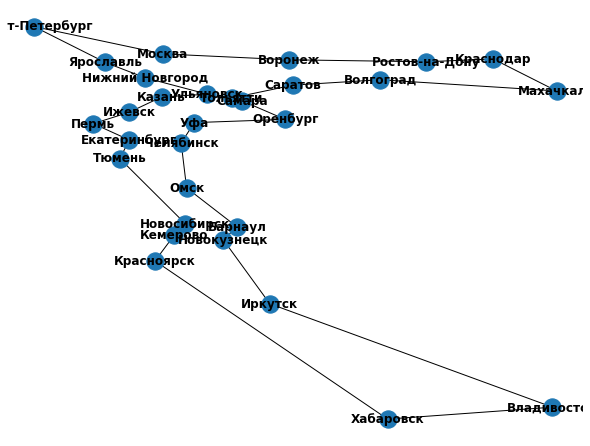

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
G = nx.Graph()
pos = {}

for i in range(len(result)):
    city_1 = result[i]
    pos[city_1[0]] = (-float(city_1[1]), -float(city_1[2]))
    city_2 = result[(i+1) % len(result)]
    G.add_node(city_1[0])
    G.add_node(city_2[0])
    G.add_edge(city_1[0], city_2[0])


nx.draw(G, pos=pos, with_labels=True, font_weight='bold')
plt.show()

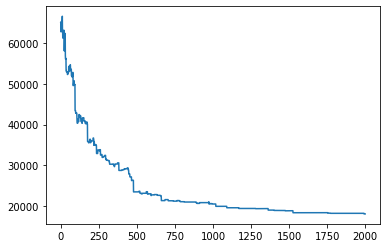

In [8]:
xxx = [i*1 for i in range(2001)]


plt.plot(xxx, saved_dist)